In [1]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

# local packages 
from utils_causal import *
from utils_results_analysis import *

import pickle

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
a = [12,32]
print a[1:]

[32]


---- Plant

In [ ]:
num_files = 10

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

file_str = "../../ts_results/plant/plant_00.50.0001_"
file_post = '.dat'


for i in range(num_files):
    
    py_ts = np.load( file_str + str(i) + file_post )
    py_df = pd.DataFrame( py_ts, columns = cols)
    print 'File ', i, py_df.shape, py_df.columns

    indi_prior = prior(py_df, num_vari, vari_name)

    indi_poster = individual_posterior(py_df, num_vari, vari_name)

    aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

    aggre_posterior = aggregate_poster(indi_poster, num_vari, vari_name)

    

In [24]:
# PLANT : MV-LSTM attention

# ganger causal: # [0, 1, 2, 4]
# 'plant-temp.', 'cloudcover', 'dewpoint', temperature'

num_vari = 8

vari_name = ['Plant-temp.', 'Cloud cover', 'Dew point', 'Humidity', 'Temperature', 'Wind bearing', \
             'Wind speed', 'Autoregressive']

# --- load data
# "../../ts_results/plant/plant_0.50.001_17.dat", 18, 19
# plant_00.50.0001_48.dat

py_ts = np.load("../../ts_results/plant/plant_00.50.0001_48.dat")
print np.shape(py_ts)

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)
print py_df.shape, py_df.columns


# ----

indi_prior = prior(py_df, num_vari, vari_name)

indi_poster = individual_posterior(py_df, num_vari, vari_name)

aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

aggregate_poster(indi_poster, num_vari, vari_name)

posterior(py_df, num_vari, vari_name, aggre_prior)    

(662, 18)
(662, 18) Index([u'truth', u'pred', u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7',
       u'pre0', u'pre1', u'pre2', u'pre3', u'pre4', u'pre5', u'pre6', u'pre7'],
      dtype='object')

 --- individual prior mean and variance:
[('Wind bearing', 0.04796707460774936), ('Plant-temp.', 0.04918889665914266), ('Dew point', 0.06834015918451043), ('Humidity', 0.07583444565815958), ('Temperature', 0.1257108442339022), ('Wind speed', 0.16043289377722675), ('Cloud cover', 0.19043465118765202), ('Autoregressive', 0.2820910333889309)]

 --- individual_posterior mean and variance :
[('Plant-temp.', 0.04771250085669403), ('Wind bearing', 0.0512143814316873), ('Dew point', 0.05771299301276701), ('Humidity', 0.06404664019063797), ('Temperature', 0.09391935569056606), ('Wind speed', 0.12134577992758137), ('Cloud cover', 0.26067175720784114), ('Autoregressive', 0.3033765916822251)]

 --- aggregated prior :
[('Wind bearing', 0.04796707394565917), ('Plant-temp.', 0.04918889598018764), ('Dew poin

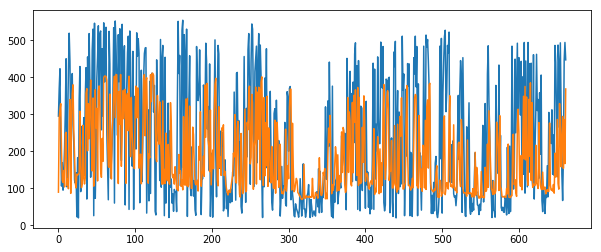

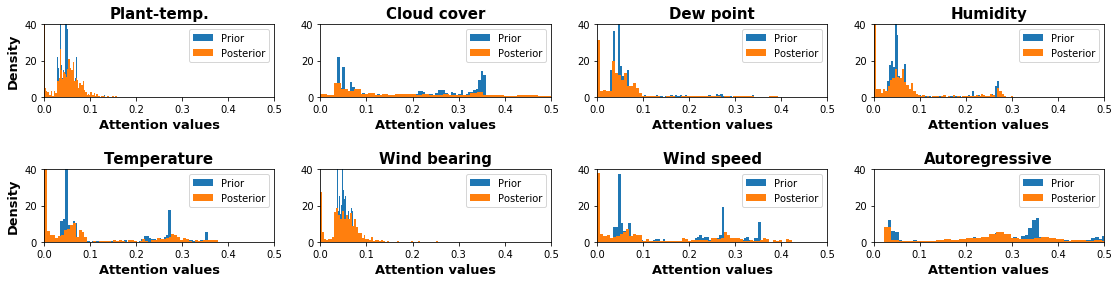

In [26]:
# PLANT : MV-LSTM attention PLOT

fig, ax = plt.subplots(figsize=(10,4))
y = py_df['truth']
py = py_df['pred']
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), py)


fig, ax = plt.subplots(2, 4, figsize=(19,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=1.0)
num_bins = 60

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/4][i%4].hist(tmp_set, num_bins, density = True, label = 'Prior')
    ax[i/4][i%4].set_xlim(0, 0.6)
    ax[i/4][i%4].set_ylim(0, 40)
    ax[i/4][i%4].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    tmp_set = [j[i] for j in indi_poster]  
    
    ax[i/4][i%4].hist(tmp_set, num_bins, density = True, label = 'Posterior')
    ax[i/4][i%4].set_xlim(0, 0.5)
    ax[i/4][i%4].set_ylim(0, 40)
    ax[i/4][i%4].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/4][i%4].legend(fontsize=10)
    
    
    ax[i/4][i%4].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%4 == 0:
        ax[i/4][i%4].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
fig.savefig('../../ts_results/figure/plant_mv_poster.eps', bbox_inches='tight')


---- ENERGY

In [29]:
# ENERGY : MV-LSTM attention

# ganger causal: 1,8 , Living room temp., Parents room temp.
num_vari = 14
vari_name = ['Kitchen temp.', 'Living room temp.', 'Laundry room temp.', 'Office room temp.',\
             'Bathroom temp.','Building outside temp.', 'Ironing room temp.', 'Teenager room temp.',\
             'Parents room temp.', 'Outside temp.', 'Wind speed', 'Humidity outside', \
             'Dew point', 'Autoregressive'  ]

# T1, Temperature in kitchen area 
# T2, Temperature in living room area, in Celsius 
# T3, Temperature in laundry room area 
# T4, Temperature in office room, in Celsius 
# T5, Temperature in bathroom, in Celsius 
# T6, Temperature outside the building (north side), in Celsius 
# T7, Temperature in ironing room , in Celsius 
# T8, Temperature in teenager room 2, in Celsius 
# T9, Temperature in parents room, in Celsius 
# To, Temperature outside (from Chievres weather station), in Celsius 
# Pressure (from Chievres weather station), in mm Hg 
# RH_out, Humidity outside (from Chievres weather station), in % 
# Wind speed (from Chievres weather station), in m/s 
# Visibility (from Chievres weather station), in km 
# Tdewpoint (from Chievres weather station), Â°C 

# energy_1.00.01_13
# energy_00.80.0001_18.dat
# energy_00.50.001_24.dat
# energy_10.80.0001_38

# 10.80.0001_38

py_ts = np.load("../../ts_results/energy/energy_10.80.0001_46.dat")
print np.shape(py_ts)

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)
print py_df.shape, py_df.columns

#  -----

indi_prior = prior(py_df, num_vari, vari_name)

indi_poster = individual_posterior(py_df, num_vari, vari_name)

aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

aggregate_poster(indi_poster, num_vari, vari_name)

posterior(py_df, num_vari, vari_name, aggre_prior)    

(2113, 30)
(2113, 30) Index([u'truth', u'pred', u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8',
       u'9', u'10', u'11', u'12', u'13', u'pre0', u'pre1', u'pre2', u'pre3',
       u'pre4', u'pre5', u'pre6', u'pre7', u'pre8', u'pre9', u'pre10',
       u'pre11', u'pre12', u'pre13'],
      dtype='object')

 --- individual prior mean and variance:
[('Teenager room temp.', 0.027303280974387896), ('Ironing room temp.', 0.0316970347767538), ('Outside temp.', 0.03367437868940142), ('Office room temp.', 0.037851078134299845), ('Kitchen temp.', 0.03868542945870166), ('Building outside temp.', 0.046383047068268554), ('Wind speed', 0.05051775637377623), ('Humidity outside', 0.05522438496354768), ('Dew point', 0.061326485093712975), ('Parents room temp.', 0.06557396127169328), ('Living room temp.', 0.08119043076152606), ('Autoregressive', 0.12201889253486348), ('Laundry room temp.', 0.17086095426987963), ('Bathroom temp.', 0.1776928852801068)]

 --- individual_posterior mean and variance :
[(

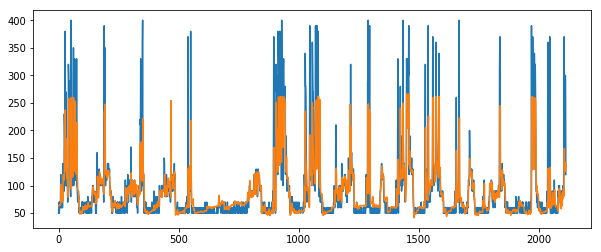

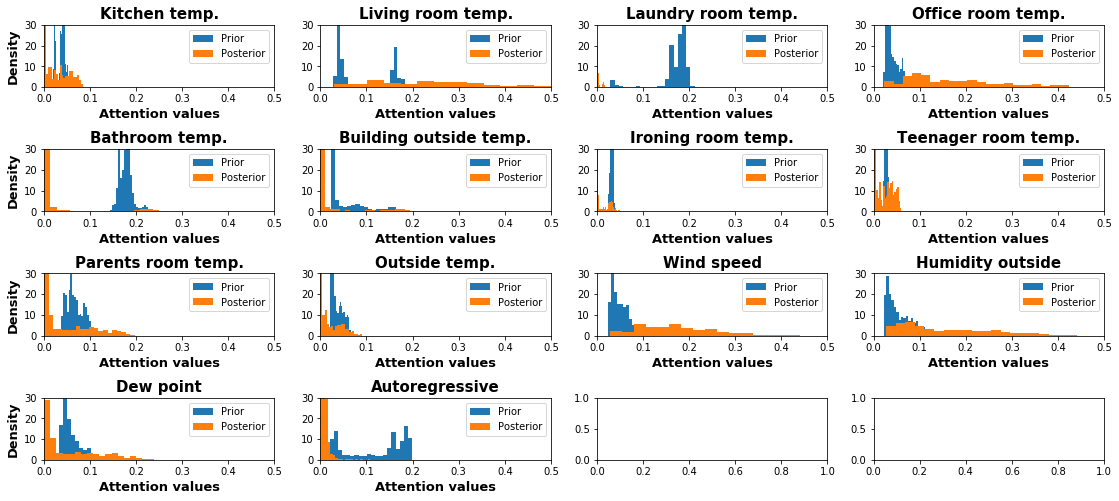

In [33]:
# ENERGY : MV-LSTM attention PLOT

fig, ax = plt.subplots(figsize=(10,4))
y = py_df['truth']
py = py_df['pred']
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), py)


fig_row = 4
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
num_bins = 20

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Prior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.5)
    ax[i/fig_col][i%fig_col].set_ylim(0, 20)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    tmp_set = [j[i] for j in indi_poster]  
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Posterior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.5)
    ax[i/fig_col][i%fig_col].set_ylim(0, 30)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].legend(fontsize=10)
    
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    
fig.savefig('../../ts_results/figure/energy_mv_poster.eps', bbox_inches='tight')


---- PM2.5

In [56]:
# PM25 : MV-LSTM attention

# ganger causal: 0,1,2 'Dew Point', 'Temperature', 'Pressure',
num_vari = 7
vari_name = ['Dew Point', 'Temperature', 'Pressure', 'Cumulated wind speed', \
             'Cumulated hours of snow','Cumulated hours of rain', 'Autoregressive']

# pm25_0.80.001_24
# pm25_0.80.001_23

py_ts = np.load("../../ts_results/pm25/pm25_0.80.001_23.dat")
print np.shape(py_ts)

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)
print py_df.shape

#  -----

indi_prior = prior(py_df, num_vari, vari_name)

indi_poster = individual_posterior(py_df, num_vari, vari_name)

aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

aggregate_poster(indi_poster, num_vari, vari_name)

posterior(py_df, num_vari, vari_name, aggre_prior)    

(3359, 16)
(3359, 16)

 --- individual prior mean and variance:
[('Cumulated hours of rain', 0.06844748924706762), ('Temperature', 0.08875958983162288), ('Autoregressive', 0.0899491243543512), ('Pressure', 0.09840988413155984), ('Cumulated hours of snow', 0.12213948607415928), ('Dew Point', 0.260110417837302), ('Cumulated wind speed', 0.27218400957808675)]

 --- individual_posterior mean and variance :
[('Cumulated hours of rain', 0.03683190046498204), ('Cumulated hours of snow', 0.04411755610168274), ('Autoregressive', 0.04736093228386701), ('Temperature', 0.06665726870833054), ('Pressure', 0.07298955611955542), ('Cumulated wind speed', 0.34990797567224274), ('Dew Point', 0.3821348106493395)]

 --- aggregated prior :
[('Cumulated hours of rain', 0.06844748897114032), ('Temperature', 0.0887595894738129), ('Autoregressive', 0.08994912399174594), ('Pressure', 0.09840988373484734), ('Cumulated hours of snow', 0.12213948558178739), ('Dew Point', 0.2601104167887381), ('Cumulated wind speed'

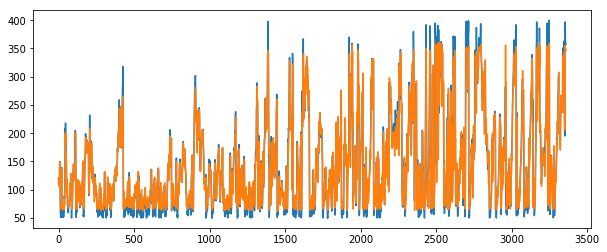

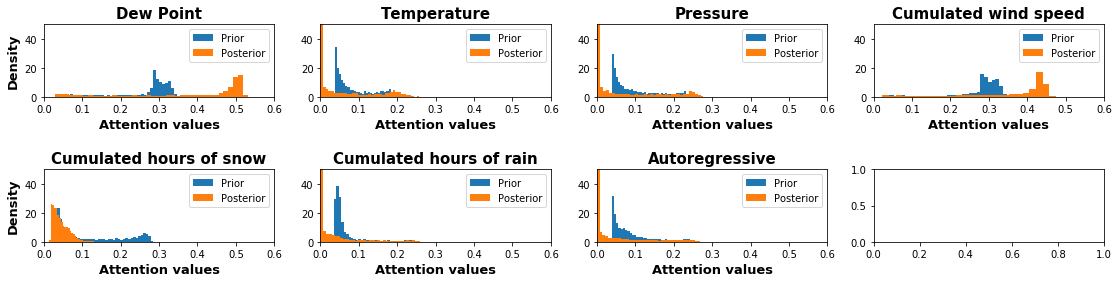

In [57]:
# PM25 : MV-LSTM attention PLOT

fig, ax = plt.subplots(figsize=(10,4))
y = py_df['truth']
py = py_df['pred']
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), py)


fig_row = 2
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Prior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)

    tmp_set = [j[i] for j in indi_poster]  
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Posterior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 13)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 13)
    
    
    ax[i/fig_col][i%fig_col].legend(fontsize=10)
    
fig.savefig('../../ts_results/figure/pm_mv_poster.eps', bbox_inches='tight')


In [6]:
# PM2.5 CLSTM

num_vari = 7
att  = [0.17374223,0.32961404,0.19906539,0.0005875013,0.0013681239,0.0009232172,0.0005405182]

for i in range(num_vari):
    if att[i] < 1e-2:
        att[i] = 0.0

print sorted( list(zip(vari_name, att)), key = lambda x: x[1] )
    
# 0.18104714,0.19856167,0.10827577,0.00035925463,0.0005451732,0.21557647,0.099544466,
# 0.12856844,0.20194638,0.14840071,0.00049849955,0.0005578786,0.0004996133,0.16396974,
# 0.0008651622,0.61560917,0.49236092,0.17443651,0.0009570704,0.08571515,0.39498904,
# 0.5059373,0.5770229,0.2992319,0.4754351,0.00099338,0.0015967741,0.42467982,

[('Cumulated wind speed', 0.0), ('Cumulated hours of snow', 0.0), ('Cumulated hours of rain', 0.0), ('auto-reg', 0.0), ('Dew Point', 0.17374223), ('Pressure', 0.19906539), ('Temperature', 0.32961404)]


---- Synthetic

In [2]:
# Synthetic : MV-LSTM attention

# ganger causal:
num_vari = 11
vari_name = ['Variable 0', 'Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5',\
             'Variable 6', 'Variable 7', 'Variable 8', 'Variable 9', 'Autoregressive']

py_ts = np.load("../../ts_results/syn/syn_20.80.0001_50.dat")
print np.shape(py_ts)

# attention, individual prediction
cols_att = [str(i) for i in range(num_vari)]
cols_pred = ['pre' + str(i) for i in range(num_vari)]
cols = ['truth', 'pred'] + [str(i) for i in range(num_vari)] + ['pre' + str(i) for i in range(num_vari)]

py_df = pd.DataFrame( py_ts, columns = cols)
print py_df.shape

#  -----

indi_prior = prior(py_df, num_vari, vari_name)

indi_poster = individual_posterior(py_df, num_vari, vari_name)

aggre_prior = aggregate_prior(py_df, num_vari, vari_name)

aggregate_poster(indi_poster, num_vari, vari_name)

posterior(py_df, num_vari, vari_name, aggre_prior)    

(1990, 24)
(1990, 24)

 --- individual prior mean and variance:
[('Variable 0', 0.037895777985341286), ('Variable 7', 0.040280806149669626), ('Autoregressive', 0.04446289828000356), ('Variable 9', 0.05367007686957792), ('Variable 5', 0.08122596979777717), ('Variable 2', 0.08878995158321144), ('Variable 8', 0.10356371134762937), ('Variable 4', 0.118627121935051), ('Variable 1', 0.11901454139201335), ('Variable 6', 0.134481866328261), ('Variable 3', 0.17798727882848164)]

 --- individual_posterior mean and variance :
[('Variable 5', 0.000808054405000146), ('Autoregressive', 0.01343169257167677), ('Variable 9', 0.013885000874803356), ('Variable 0', 0.02101908652883565), ('Variable 7', 0.06363226877947283), ('Variable 1', 0.08299793851894503), ('Variable 4', 0.1262040027054069), ('Variable 6', 0.14717622723965704), ('Variable 8', 0.17095489400580519), ('Variable 2', 0.175337681663702), ('Variable 3', 0.18455315270669503)]

 --- aggregated prior :
[('Variable 0', 0.03789577777607538), ('Var

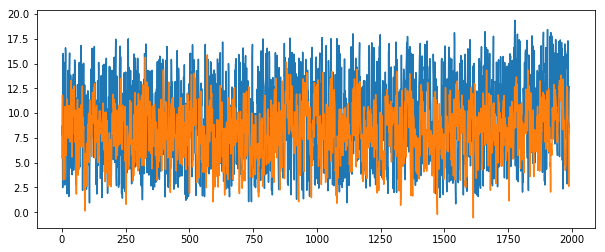

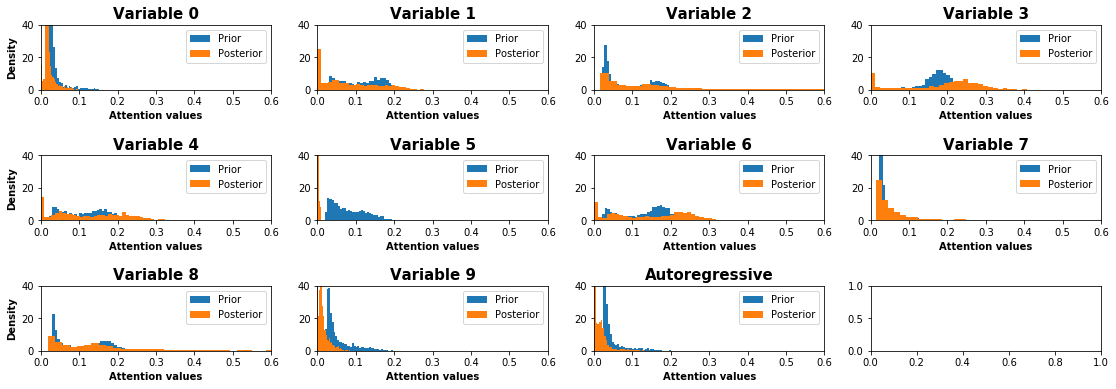

In [3]:
# Synthetic : MV-LSTM attention PLOT

fig, ax = plt.subplots(figsize=(10,4))
y = py_df['truth']
py = py_df['pred']
ax.plot(range(len(y)), y)
ax.plot(range(len(y)), py)


fig_row = 3
fig_col = 4
fig, ax = plt.subplots(fig_row, fig_col, figsize=(19,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)
num_bins = 40

for i in range(num_vari):
    
    tmp_set = [j[i] for j in indi_prior]    
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Prior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 50)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)

    tmp_set = [j[i] for j in indi_poster]  
    
    ax[i/fig_col][i%fig_col].hist(tmp_set, num_bins, density = True, label = 'Posterior')
    ax[i/fig_col][i%fig_col].set_xlim(0, 0.6)
    ax[i/fig_col][i%fig_col].set_ylim(0, 40)
    ax[i/fig_col][i%fig_col].set_title( vari_name[i], fontweight = 'bold', fontsize=15)
    
    ax[i/fig_col][i%fig_col].set_xlabel('Attention values', fontweight = 'bold', fontsize = 10)
    if i%fig_col == 0:
        ax[i/fig_col][i%fig_col].set_ylabel('Density', fontweight = 'bold', fontsize = 10)
    
    
    ax[i/fig_col][i%fig_col].legend(fontsize=10)
    
fig.savefig('../../ts_results/figure/syn_mv_poster.eps', bbox_inches='tight')


# ---- statistical analysis ----


In [ ]:
# ---- statistical analysis ----



# load data for statistical analysis

# feature_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

# DEWP: Dew Point (â„ƒ) 
# TEMP: Temperature (â„ƒ) 
# PRES: Pressure (hPa) 
# cbwd: Combined wind direction 
# Iws: Cumulated wind speed (m/s) 
# Is: Cumulated hours of snow 
# Ir: Cumulated hours of rain 

# the last column is the targe variable 
dataset_str = 'pm25'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)


# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 6)

#print causality_pairwise(VAR_res, post_ts)

In [8]:
# load data for statistical analysis

# feature_cols = [ 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9' , 'T_out', 'Windspeed', 'RH_out', \
# 'Tdewpoint' 


# -- target series
# Appliances, energy use in Wh 
# lights, energy use of light fixtures in the house in Wh 

# -- exgoneous series 
# T1, Temperature in kitchen area, in Celsius 
# T2, Temperature in living room area, in Celsius 
# T3, Temperature in laundry room area 
# T4, Temperature in office room, in Celsius 
# T5, Temperature in bathroom, in Celsius 
# T6, Temperature outside the building (north side), in Celsius 
# T7, Temperature in ironing room , in Celsius 
# T8, Temperature in teenager room 2, in Celsius 
# T9, Temperature in parents room, in Celsius 
# To, Temperature outside (from Chievres weather station), in Celsius 
# Pressure (from Chievres weather station), in mm Hg 
# RH_out, Humidity outside (from Chievres weather station), in % 
# Wind speed (from Chievres weather station), in m/s 
# Visibility (from Chievres weather station), in km 
# Tdewpoint (from Chievres weather station), Â°C 


# the last column is the targe variable 
dataset_str = 'energy'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)

# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 13)

#print causality_pairwise(VAR_res, post_ts)

(8200, 14) (2200, 14)
stationary prepro:  0 1.53873681466e-08 

stationary prepro:  0 2.67332352376e-10 

stationary prepro:  0 6.22084629443e-06 

stationary prepro:  0 7.65852979756e-08 

stationary prepro:  0 4.56317841218e-09 

stationary prepro:  0 3.12028393606e-05 

stationary prepro:  0 0.00215212148204 

stationary prepro:  0 0.000159225901517 

stationary prepro:  1 0.0 

stationary prepro:  0 8.14779094622e-05 

stationary prepro:  0 8.95657918297e-07 

stationary prepro:  0 9.36092515117e-17 

stationary prepro:  0 0.00688669851617 

stationary prepro:  0 4.24157747612e-26 

(8199, 14)
best lag:  {'fpe': 26, 'hqic': 14, 'bic': 8, 'aic': 26}
[1, 8]


In [9]:
# load data for statistical analysis

# feature_cols = ['p-temperature', 'cloudcover', 'dewpoint', 'humidity', 'temperature', 'windbearing', 'windspeed']


# the last column is the targe variable 
dataset_str = 'plant'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)

# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 7)

#print causality_pairwise(VAR_res, post_ts)

(5400, 8) (1554, 8)
stationary prepro:  1 3.89605902543e-30 

stationary prepro:  0 5.8135957626e-09 

stationary prepro:  0 0.00897549257369 

stationary prepro:  0 5.50436184832e-05 

stationary prepro:  1 0.0 

stationary prepro:  0 9.23194064666e-19 

stationary prepro:  0 2.9333505289e-20 

stationary prepro:  0 8.96960810192e-09 

(5399, 8)
best lag:  {'fpe': 39, 'hqic': 20, 'bic': 19, 'aic': 39}
[0, 1, 2, 4]


In [ ]:
# statisical test 
trans_dta = np.transpose(xtr, [1,0])
for i in range(np.shape(xtr)[1]):
    print '--', i, stationary_test( trans_dta[i] )

In [ ]:
# temporal dependency

temporal_detect_individual(6, xtr, 200)

# auto-correlation, partial auto-correlation, cross correlation 
